In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df.shape

(200000, 7)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000


In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce')

In [15]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
            day=df.pickup_datetime.dt.day,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year,
            dayofweek=df.pickup_datetime.dt.dayofweek)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
 7   hour               199999 non-null  int64              
 8   day                199999 non-null  int64              
 9   month              199999 non-null  int64              
 10  year               199999 non-null  int64              
 11  dayofweek          199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), flo

In [18]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [19]:
from math import *

# Heversine formula

hav(θ) = sin**2(θ/2).


In [20]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [21]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
 7   hour               199999 non-null  int64              
 8   day                199999 non-null  int64              
 9   month              199999 non-null  int64              
 10  year               199999 non-null  int64              
 11  dayofweek          199999 non-null  int64              
 12  dist_travel_km     199999 non-

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


<AxesSubplot:xlabel='dist_travel_km', ylabel='fare_amount'>

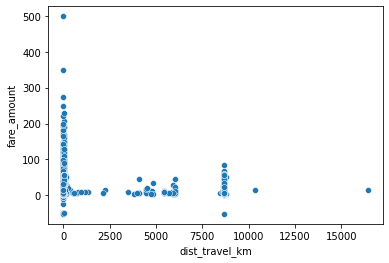

In [24]:
sns.scatterplot(data=df,x='dist_travel_km',y='fare_amount')

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000
hour,199999.0,13.491387,6.515505,0.000000,9.000000,14.000000,19.000000,23.000000
day,199999.0,15.704739,8.687377,1.000000,8.000000,16.000000,23.000000,31.000000
month,199999.0,6.281791,3.438933,1.000000,3.000000,6.000000,9.000000,12.000000
year,199999.0,2011.742434,1.856400,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


<AxesSubplot:>

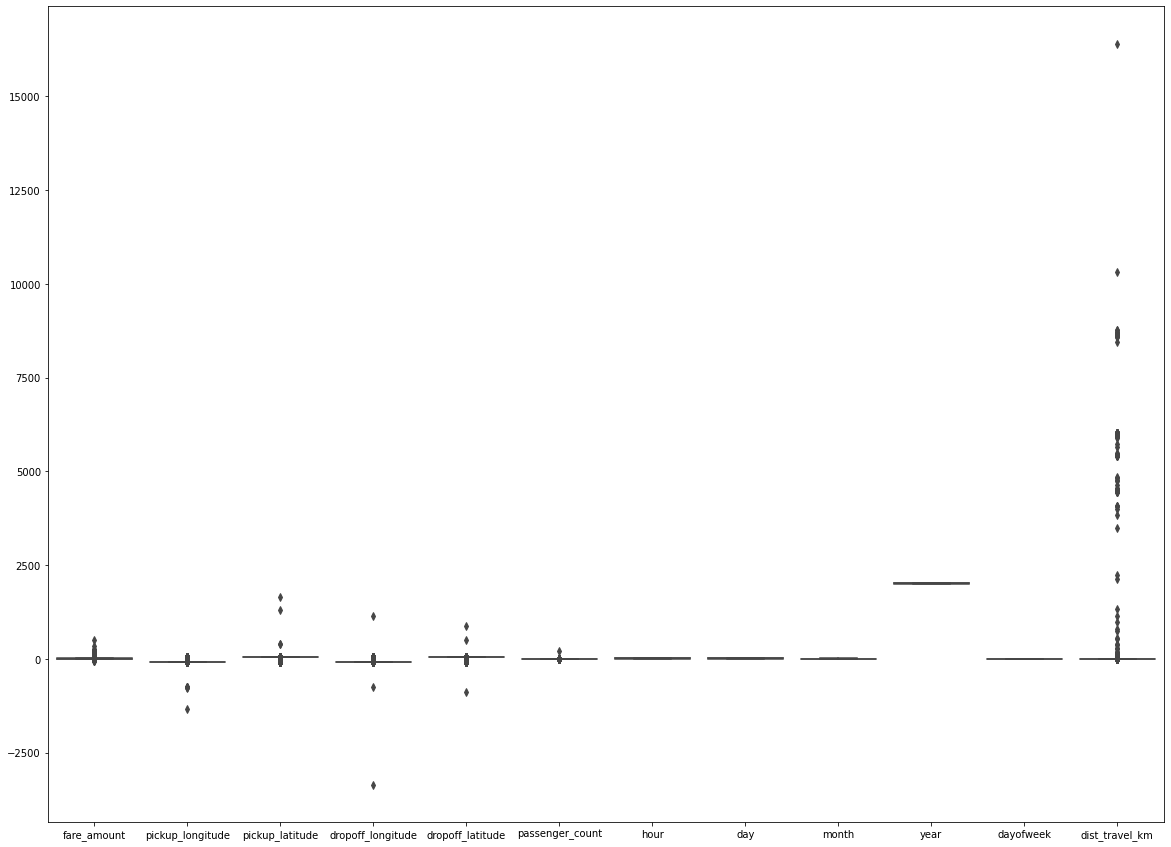

In [26]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

<AxesSubplot:ylabel='fare_amount'>

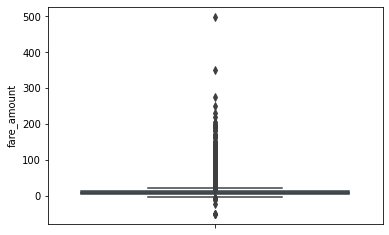

In [27]:
sns.boxplot(data=df,y='fare_amount')

<AxesSubplot:xlabel='dist_travel_km', ylabel='fare_amount'>

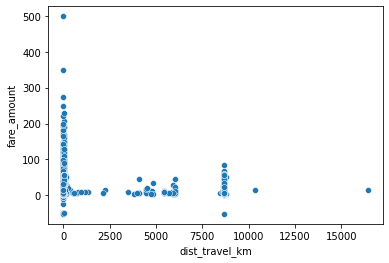

In [28]:
sns.scatterplot(x=df['dist_travel_km'],y=df['fare_amount'])

In [29]:
#We will only keep the observation where fare is between 2.5
df = df.loc[(df.fare_amount >= 0)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199982 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199982 non-null  float64            
 1   pickup_datetime    199982 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199982 non-null  float64            
 3   pickup_latitude    199982 non-null  float64            
 4   dropoff_longitude  199982 non-null  float64            
 5   dropoff_latitude   199982 non-null  float64            
 6   passenger_count    199982 non-null  int64              
 7   hour               199982 non-null  int64              
 8   day                199982 non-null  int64              
 9   month              199982 non-null  int64              
 10  year               199982 non-null  int64              
 11  dayofweek          199982 non-null  int64              
 12  dist_travel_km     199982 non-

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199982.0,11.362302,9.897102,0.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199982.0,-72.527508,11.438294,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199982.0,39.935812,7.720883,-74.015515,40.734795,40.752592,40.767158,1644.421482
dropoff_longitude,199982.0,-72.525538,13.116956,-3356.666300,-73.991407,-73.980092,-73.963658,1153.572603
dropoff_latitude,199982.0,39.924024,6.794527,-881.985513,40.733824,40.753042,40.768001,872.697628
passenger_count,199982.0,1.684502,1.385977,0.000000,1.000000,1.000000,2.000000,208.000000
hour,199982.0,13.491329,6.515457,0.000000,9.000000,14.000000,19.000000,23.000000
day,199982.0,15.705058,8.687457,1.000000,8.000000,16.000000,23.000000,31.000000
month,199982.0,6.282045,3.438948,1.000000,3.000000,6.000000,9.000000,12.000000
year,199982.0,2011.742357,1.856317,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


<AxesSubplot:ylabel='fare_amount'>

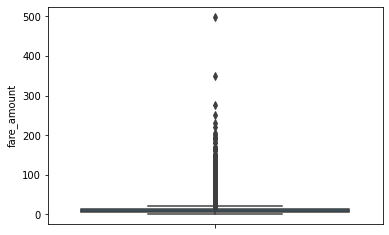

In [32]:
sns.boxplot(y=df['fare_amount'])

In [33]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [34]:
df = treat_outliers_all(df , df.iloc[: , 0::])

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199982.0,10.082222,5.438969,0.000000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,199982.0,-73.978311,0.020508,-74.029431,-73.992065,-73.981823,-73.967154,-73.929788
pickup_latitude,199982.0,40.750196,0.025659,40.686251,40.734795,40.752592,40.767158,40.815702
dropoff_longitude,199982.0,-73.976192,0.022880,-74.033030,-73.991407,-73.980092,-73.963658,-73.922034
dropoff_latitude,199982.0,40.750151,0.028660,40.682558,40.733824,40.753042,40.768001,40.819267
passenger_count,199982.0,1.514341,0.876694,0.000000,1.000000,1.000000,2.000000,3.500000
hour,199982.0,13.491329,6.515457,0.000000,9.000000,14.000000,19.000000,23.000000
day,199982.0,15.705058,8.687457,1.000000,8.000000,16.000000,23.000000,31.000000
month,199982.0,6.282045,3.438948,1.000000,3.000000,6.000000,9.000000,12.000000
year,199982.0,2011.742357,1.856317,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


<AxesSubplot:ylabel='fare_amount'>

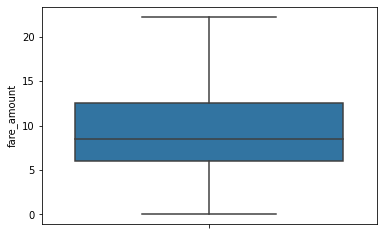

In [36]:
sns.boxplot(y=df['fare_amount'])

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

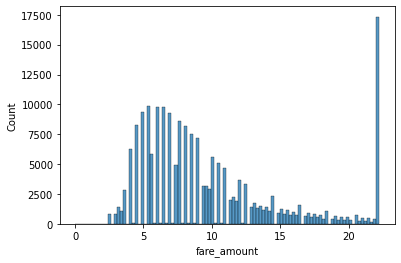

In [37]:
sns.histplot(x=df['fare_amount'])

In [38]:
sns.histplot(x=df['dist_travel_km'])

<AxesSubplot:>

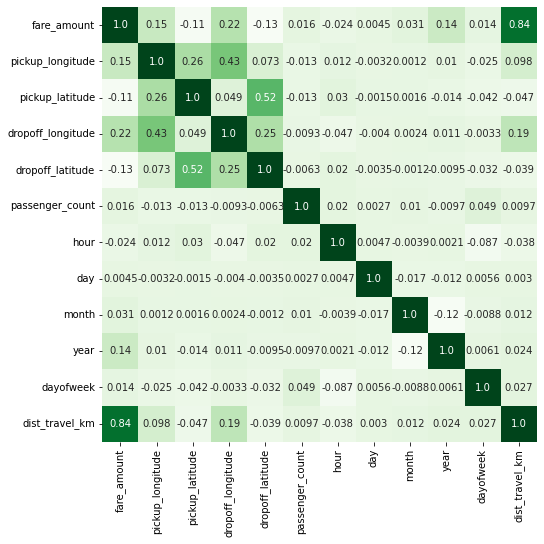

In [39]:
corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,cbar=False,square=True,fmt='.2',annot=True,cmap='Greens')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2764969d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a276496f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a276496700>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2764a3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2764a3820>],
 'means': []}

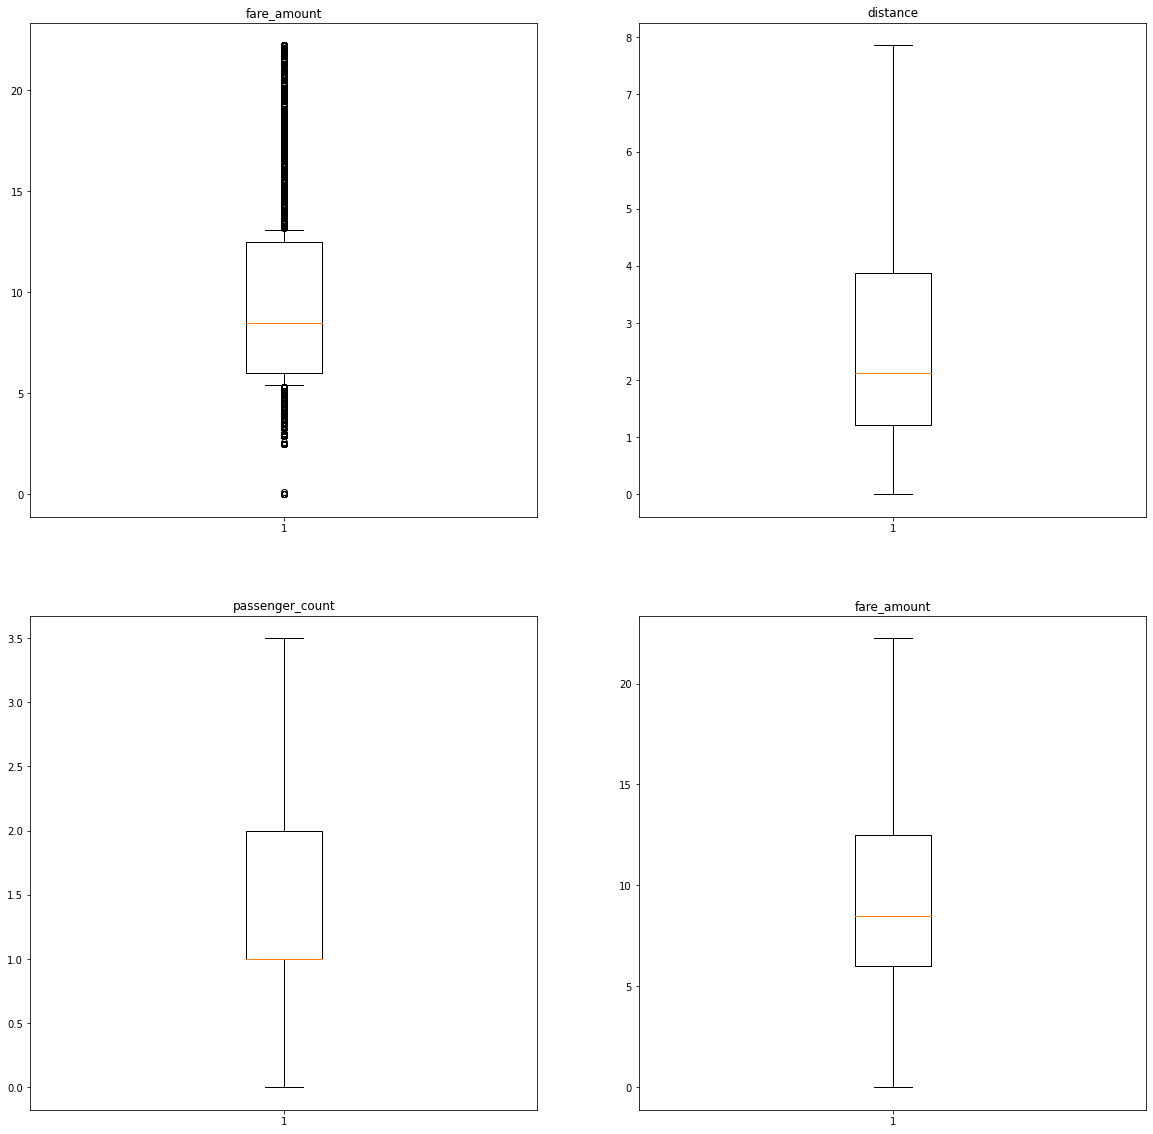

In [40]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
axes[0,0].set_title('fare_amount')
axes[0,0].boxplot(df["fare_amount"],whis=0.1)
axes[0,1].set_title('distance')
axes[0,1].boxplot(df["dist_travel_km"])
axes[1,0].set_title('passenger_count')
axes[1,0].boxplot(df["passenger_count"])
axes[1,1].set_title('fare_amount')
axes[1,1].boxplot(df["fare_amount"])


# Assigning the dependent and independent variable

In [41]:
x_val=df.iloc[:,12:]
print(x_val)

        dist_travel_km
0             1.683323
1             2.457590
2             5.036377
3             1.661683
4             4.475450
...                ...
199995        0.112210
199996        1.875050
199997        7.865287
199998        3.539715
199999        5.417783

[199982 rows x 1 columns]


In [42]:
y_val=df.iloc[:,0:1]
print(y_val)


        fare_amount
0              7.50
1              7.70
2             12.90
3              5.30
4             16.00
...             ...
199995         3.00
199996         7.50
199997        22.25
199998        14.50
199999        14.10

[199982 rows x 1 columns]


# Splitting the Dataset

Training and Test Set


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=0)

In [44]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

159985
159985
39997
39997


# Simple Linear Regression

Training the simple linear regression model on the training set


In [45]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.7183788


# Actual vs Predicted Values

In [46]:
y_pred=l_reg.predict(X_test)
print(y_pred)
print(y_test)

In [47]:
x_test_val=[[8],[7],[6],[5],[4],[3],[2],[1]]
y_pred_val=l_reg.predict(x_test_val)
print(y_pred_val)

[[20.70534308]
 [18.64092055]
 [16.57649802]
 [14.51207548]
 [12.44765295]
 [10.38323042]
 [ 8.31880788]
 [ 6.25438535]]


c:\users\aishwarya\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9680736813068274
Mean Squared Error: 8.343106214402711
Root Mean Squared Error: 2.888443562613386


In [49]:
y_test.shape

(39997, 1)

In [50]:
y_pred.shape

(39997, 1)

In [51]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

# Random Forest Regressor

In [52]:
X=df.loc[:,['dist_travel_km']]
Y=df.loc[:,['fare_amount']]

In [53]:
print("X dtypes:\n",X.dtypes)
print("Y dtypes:\n",Y.dtypes)
print("Info\n:",X.info())
print("Info\n:",Y.info())

X dtypes:
 dist_travel_km    float64
dtype: object
Y dtypes:
 fare_amount    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199982 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dist_travel_km  199982 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB
Info
: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199982 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fare_amount  199982 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB
Info
: None


In [54]:
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
#sc_1=StandardScaler()
#x_train['dist_travel_km']=sc_1.fit_transform(x_train['dist_travel_km'].values.reshape(-1,1))
#x_test['dist_travel_km']=sc_1.transform(x_test['dist_travel_km'].values.reshape(-1,1))


In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(139987, 1)
(139987, 1)
(59995, 1)
(59995, 1)


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

<ipython-input-56-1cc82d02aa37>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train,y_train)


RandomForestRegressor()

In [57]:
rf_reg.score(x_train,y_train)

0.9019785425238058

In [58]:
y_pred_values=rf_reg.predict(x_test)
y_pred_values

array([ 5.176,  7.208, 14.445, ...,  6.279,  8.416,  9.336])

In [59]:
print(X_test.shape)
print(y_pred_values.shape)
print(y_test.shape)

(39997, 1)
(59995,)
(59995, 1)


In [60]:
x_predct_val=[[8],[7],[6],[5],[4],[3],[2],[1]]
y_predct=rf_reg.predict(x_predct_val)

c:\users\aishwarya\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [61]:
y_predct

array([21.15591025, 15.738     , 18.319     , 16.737     , 11.4       ,
       11.362     ,  6.825     ,  5.593     ])

In [62]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_values ))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_values)))

Mean Absolute Error: 2.1611344576334557
Mean Squared Error: 9.935864716071075
Root Mean Squared Error: 3.1521206696557598
